In [1]:
# from sklearn.datasets import make_regression
# from matplotlib import pyplot as plt
# import numpy as np
# from sklearn.linear_model import LinearRegression

# X, y, coefficients = make_regression(
#    n_samples=50,
#    n_features=1,
#    n_informative=1,
#    n_targets=1,
#    noise=5,
#    coef=True,
#    random_state=1
# )
# n = X.shape[1]
# r = np.linalg.matrix_rank(X)

# U, sigma, VT = np.linalg.svd(X, full_matrices=False)

# D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

# V = VT.T

# X_plus = V.dot(D_plus).dot(U.T)
# w = X_plus.dot(y)
# print(w)
# error = np.linalg.norm(X.dot(w) - y, ord=2) ** 2
# print("error",error)
# print(np.linalg.lstsq(X, y))






In [2]:
# print("first graph")
# plt.scatter(X, y)
# plt.plot(X, w*X, c='red')


# print("second graph")
# lr = LinearRegression()
# lr.fit(X, y)
# w = lr.coef_[0]
# plt.scatter(X, y)
# plt.plot(X, w*X, c='red')


In [3]:
# # Breen et al.(2013), not all constants are described

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import odeint

# # define mixing model
# def vessel(x, t, q, qf, Caf, Tf):
#     # inputs (x):
#     C_fad_insp_water = x[0]  
#     C_fad_venous = x[1]
#     C_e2_brain = x[2]
#     C_fad_brain = x[3]
#     C_fad_ovary = x[4]
#     C_e2_ovary = x[5]
#     C_CYP19A = x[6]
#     C_e2_liver = x[7]
#     C_fad_liver = x[8]
#     C_fad_RoB = x[9]
#     C_e2_RoB = x[10]
    
#     C_e2_arterial = x[11]  
#     C_fad_arterial = x[12] 
#     C_CYP19A_mRNA = x[13]  
#     C_LHFSH_R_LHFSH = x[14]  
    
#     # constants
#     Q_water_gill = 0.05714
#     Q_cardiac = 0.0111
#     P_fad_water_blood = 1
#     V_brain = 0.000012
#     Q_brain = 0.0004247
#     P_e2_brain_blood = 1
#     k_0_syn_LHFSH = 0.000000001726
#     k_loss_LHFSH = 34.07
#     A_LHFSH_brain = None
#     k_LHFSH = 0.01534
#     K_i_e2 = 0.00005311
#     V_ovary = 0.000144
#     Q_ovary = 0.006292
#     P_fad_ovary_blood = 1
#     V_max_CYP19A = None
#     P_e2_ovary_blood = 1
#     C_T = 0.014146
#     K_m_T = 0.0096
#     K_i_fad = 0.001981
#     V_max_syn_CYP19A = 0.003149
#     K_m_syn_CYP19A = 6537
#     k_loss_CYP19A = 0.01374
#     A_CYP19A = None
#     k_cat_CYP19A = 0.00060093
#     k_syn_mRNA_basal = 0.00001474
#     k_syn_mRNA_max = 0.925
#     K_a_syn_mRNA = 2.278*10^-20
#     k_loss_mRNA = 0.01494
#     A_CYP19A_mRNA = None
#     V_liver = 0.000024
#     Q_liver = 0.00065
#     A_fad_liver = None
#     k_loss_fad = 46.98
#     P_fad_liver_blood = 1
#     P_e2_liver_blood = 1
#     A_e2_liver = None
#     k_loss_e2 = 11.67
#     V_venous = 0.00002448
#     A_R_LHFSH = None
#     A_LHFSH_R_LHFSH = None
#     A_LHFSH_venous = None
#     k_LHFSH_on = 0.0002
#     k_LHFSH_off = 0.8004
#     V_RoB = 0.0007267
#     Q_RoB = 0.003738
#     P_fad_RoB_blood = 1
#     P_e2_RoB_blood = 1
    
#     # Gill
#     C_fad_gill = (Q_water_gill*C_fad_insp_water + Q_cardiac*C_fad_venous)/(Q_cardiac + Q_water_gill/P_fad_water_blood)

#     # Brain
#     # E2
#     V_brain*dC_e2_braindt = Q_brain*(C_e2_arterial - C_e2_brain/P_e2_brain_blood)
#     # FAD
#     V_brain*dC_fad_braindt = Q_brain*(C_fad_arterial - C_fad_brain/P_fad_brain_blood)
#     # LH/FSH
#     V_brain*dC_LHFSH_braindt = k_0_syn_LHFSH - k_loss_LHFSH*A_LHFSH_brain - k_LHFSH*A_LHFSH_brain/(1 + C_e2_brain/K_i_e2)
    
#     # Ovary
#     # FAD
#     V_ovary*dC_fad_ovarydt = Q_ovary*(C_fad_arterial - C_fad_ovary/P_fad_ovary_blood)
#     # E2
#     V_ovary*dC_e2_ovarydt = Q_ovary*(C_e2_arterial - C_e2_ovary/P_e2_ovary_blood) + V_max_CYP19A*C_T/(K_m_T*(1 + C_fad_ovary/K_i_fad) + C_T)
#     # cyp19a
#     V_ovary*dC_CYP19Adt = V_max_syn_CYP19A*C_CYP19A_mRNA/(K_m_syn_CYP19A + C_CYP19A_mRNA) - k_loss_CYP19A*A_CYP19A
#     # V_max_cyp19a (conversion of T to E2)
#     V_max_CYP19A = k_cat_CYP19A*A_CYP19A
#     # CYP19A mRNA
#     V_ovary*dC_CYP19A_mRNAdt = k_syn_mRNA_basal + (k_syn_mRNA_max - k_syn_mRNA_basal)*C_LHFSH_R_LHFSH/(K_a_syn_mRNA + C_LHFSH_R_LHFSH) - k_loss_mRNA*A_CYP19A_mRNA
    
#     # Liver
#     # FAD
#     V_liver*dC_fad_liverdt = Q_liver*(C_fad_arterial - C_fad_liver/P_fad_liver_blood) - k_loss_fad*A_fad_liver
#     # E2
#     V_liver*dC_e2_liverdt = Q_liver*(C_e2_arterial - C_e2_liver/P_e2_liver_blood) - k_loss_e2*A_e2_liver
    
#     # Venous Blood
#     # LH/FSH-receptor complex
#     A_R_LHFSH_free = A_R_LHFSH - A_LHFSH_R_LHFSH
#     A_LHFSH_venous_free = A_LHFSH_venous - A_LHFSH_R_LHFSH
#     dA_LHFSH_R_LHFSHdt = k_LHFSH_on*A_LHFSH_venous_free*A_R_LHFSH_free - k_LHFSH_off*A_LHFSH_R_LHFSH
#     # LH/FSH
#     V_venous*dC_LHFSH_venousdt = k_LHFSH*A_LHFSH_brain/(1 + C_e2_brain/K_i_e2) - k_loss_LHFSH*A_LHFSH_venous_free
#     # E2
#     V_venous*dC_e2_venousdt = Q_liver*C_e2_liver/P_e2_liver_blood + Q_ovary*C_e2_ovary/P_e2_ovary_blood + Q_brain*C_e2_brain/P_e2_brain_blood + Q_RoB*C_e2_RoB/P_e2_RoB_blood - Q_cardiac*C_e2_venous
#     # FAD
#     V_venous*dC_fad_venousdt = Q_liver*C_fad_liver/P_fad_liver_blood + Q_ovary*C_fad_ovary/P_fad_ovary_blood + Q_brain*C_fad_brain/P_fad_brain_blood + Q_RoB*C_fad_RoB/P_fad_RoB_blood - Q_cardiac*C_fad_venous
    
#     # RoB
#     # FAD
#     V_RoB*dC_fad_RoB = Q_RoB*(C_fad_arterial - C_fad_RoB/P_fad_RoB_blood)
#     # E2
#     V_RoB*dC_e2_RoB = Q_RoB*(C_e2_arterial - C_e2_RoB/P_e2_RoB_blood)
    
#     # Return derivatives
#     return [C_fad_gill, dC_e2_braindt, dC_fad_braindt, dC_LHFSH_braindt, dC_fad_ovarydt, dC_e2_ovarydt, \
#             dC_CYP19Adt, V_max_CYP19A, dC_CYP19A_mRNAdt, dC_fad_liverdt, dC_e2_liverdt, dA_LHFSH_R_LHFSHdt, \
#             dC_LHFSH_venousdt, dC_e2_venousdt, dC_fad_venousdt, dC_fad_RoB, dC_e2_RoB]


# # Time Interval (min)
# t = np.linspace(0,10,100)

# # inputs (concentrations)
# C_fad_insp_water = np.ones(len(t))*1  # no equation/initial state are supported
# C_fad_venous = np.ones(len(t))*1  # the initial condition is not on the paper
# C_e2_brain = np.ones(len(t))*1  # the initial condition is not on the paper
# C_fad_brain = np.ones(len(t))*1  # the initial condition is not on the paper
# C_fad_ovary = np.ones(len(t))*1  # the initial condition is not on the paper
# C_e2_ovary = np.ones(len(t))*1  # the initial condition is not on the paper
# C_CYP19A = np.ones(len(t))*1  # the initial condition is not on the paper
# C_e2_liver = np.ones(len(t))*1  # the initial condition is not on the paper
# C_fad_liver = np.ones(len(t))*1  # the initial condition is not on the paper
# C_fad_RoB = np.ones(len(t))*1  # the initial condition is not on the paper
# C_e2_RoB = np.ones(len(t))*1  # the initial condition is not on the paper
# C_e2_arterial = np.ones(len(t))*1  # no equation/initial state are supported
# C_fad_arterial = np.ones(len(t))*1  # no equation/initial state are supported
# C_CYP19A_mRNA = np.ones(len(t))*1  # the initial condition is not on the paper
# C_LHFSH_R_LHFSH = np.ones(len(t))*1  # no equation/initial state are supported
    
# # Storage for initial conditions
# C_fad_gill0 = 0.0
# dC_e2_braindt0 = 0.0
# dC_fad_braindt0 = 0.0
# dC_LHFSH_braindt0 = 0.0
# dC_fad_ovarydt0 = 0.0
# dC_e2_ovarydt0 = 0.0
# dC_CYP19Adt0 = 0.0
# V_max_CYP19A0 = 0.0
# dC_CYP19A_mRNAdt0 = 0.0
# dC_fad_liverdt0 = 0.0
# dC_e2_liverdt0 = 0.0
# dA_LHFSH_R_LHFSHdt0 = 0.0
# dC_LHFSH_venousdt0 = 0.0
# dC_e2_venousdt0 = 0.0
# dC_fad_venousdt0 = 0.0
# dC_fad_RoB0 = 0.0
# dC_e2_RoB0 = 0.0

# y0 = [C_fad_gill0, dC_e2_braindt0, dC_fad_braindt0, dC_LHFSH_braindt0, dC_fad_ovarydt0, dC_e2_ovarydt0, \
#         dC_CYP19Adt0, V_max_CYP19A0, dC_CYP19A_mRNAdt0, dC_fad_liverdt0, dC_e2_liverdt0, dA_LHFSH_R_LHFSHdt0, \
#         dC_LHFSH_venousdt0, dC_e2_venousdt0, dC_fad_venousdt0, dC_fad_RoB0, dC_e2_RoB0]

# C_fad_gill = np.ones(len(t))*C_fad_gill0
# dC_e2_braindt = np.ones(len(t))*dC_e2_braindt0
# dC_fad_braindt = np.ones(len(t))*dC_fad_braindt0
# dC_LHFSH_braindt = np.ones(len(t))*dC_LHFSH_braindt0
# dC_fad_ovarydt = np.ones(len(t))*dC_fad_ovarydt0
# dC_e2_ovarydt = np.ones(len(t))*dC_e2_ovarydt0
# dC_CYP19Adt = np.ones(len(t))*dC_CYP19Adt0
# V_max_CYP19A = np.ones(len(t))*V_max_CYP19A0
# dC_CYP19A_mRNAdt = np.ones(len(t))*dC_CYP19A_mRNAdt0
# dC_fad_liverdt = np.ones(len(t))*dC_fad_liverdt0
# dC_e2_liverdt = np.ones(len(t))*dC_e2_liverdt0
# dA_LHFSH_R_LHFSHdt = np.ones(len(t))*dA_LHFSH_R_LHFSHdt0
# dC_LHFSH_venousdt = np.ones(len(t))*dC_LHFSH_venousdt0
# dC_e2_venousdt = np.ones(len(t))*dC_e2_venousdt0
# dC_fad_venousdt = np.ones(len(t))*dC_fad_venousdt0
# dC_fad_RoB = np.ones(len(t))*dC_fad_RoB0
# dC_e2_RoB = np.ones(len(t))*dC_e2_RoB0


# # Loop through each time step
# for i in range(len(t) - 1):
#     # Simulate
#     inputs = (C_fad_insp_water[i], C_fad_venous[i], C_e2_brain[i], C_fad_brain[i], C_fad_ovary[i] \
#               C_e2_ovary[i], C_CYP19A[i], C_e2_liver[i], C_fad_liver[i], C_fad_RoB[i], C_e2_RoB[i] \
#               C_e2_arterial[i], C_fad_arterial[i], C_CYP19A_mRNA[i], C_LHFSH_R_LHFSH[i])
#     ts = [t[i], t[i+1]]
#     y = odeint(vessel, y0, ts, args=inputs)
#     # Store results
#     C_fad_gill[i + 1] = y[-1][0]
#     dC_e2_braindt[i + 1] = y[-1][1]
#     dC_fad_braindt[i + 1] = y[-1][2]
#     dC_LHFSH_braindt[i + 1] = y[-1][3]
#     dC_fad_ovarydt[i + 1] = y[-1][4]
#     dC_e2_ovarydt[i + 1] = y[-1][5]
#     dC_CYP19Adt[i + 1] = y[-1][6]
#     V_max_CYP19A[i + 1] = y[-1][7]
#     dC_CYP19A_mRNAdt[i + 1] = y[-1][8]
#     dC_fad_liverdt[i + 1] = y[-1][9]
#     dC_e2_liverdt[i + 1] = y[-1][10]
#     dA_LHFSH_R_LHFSHdt[i + 1] = y[-1][11]
#     dC_LHFSH_venousdt[i + 1] = y[-1][12]
#     dC_e2_venousdt[i + 1] = y[-1][13]
#     dC_fad_venousdt[i + 1] = y[-1][14]
#     dC_fad_RoB[i + 1] = y[-1][15]
#     dC_e2_RoB[i + 1] = y[-1][16]
    
#     # Adjust initial condition for next loop
#     y0 = y[-1]

# # Plot the inputs and results
# plt.figure()

# plt.subplot(2,2,1)
# plt.plot(t, dC_e2_venousdt, 'b:', linewidth=3)
# plt.ylabel('e2 ')
# plt.legend(['e2'],loc='best')

# plt.subplot(2,2,2)
# plt.plot(t, dC_fad_venousdt, 'b:', linewidth=3)
# plt.ylabel('FAD')
# plt.legend(['FAD'],loc='best')


# plt.show()

In [4]:
# following the Cheng et al.(2016), all constants are described.
    
    
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define body model
def body(x, t, C_fad_water):
     
    # inputs (y0 in the input part) (x):
    C_fad_ovary = x[0]  
    C_e2_ovary = x[1]
    C_T_ovary = x[2]
    C_CYP19A = x[3]
    C_CYP19A_mRNA = x[4]
    C_fad_liver = x[5]
    C_e2_liver = x[6]
    C_fad_RoB = x[7]
    C_e2_RoB = x[8]
    C_fad_venous = x[9]
    C_e2_venous = x[10]
    C_LHFSH_R_LHFSH = x[11]
    C_LHFSH_venous = x[12]  
    C_fad_brain = x[13]  
    C_e2_brain = x[14]  
    C_LHFSH_brain = x[15]  
    
    # constants
    Q_water_gill = 5.714
    Q_cardiac = 0.0111
    P_fad_water_blood = 1
    V_brain = 0.000012
    Q_brain = 0.0004247
    P_e2_brain_blood = 1
    P_fad_brain_blood = 1
    
#--------------------------------------------------
    K_loss_LHFSH = 0.0797
    K_syn_mRNA_max = 0.003 # 0.0164  # 0.925 in Breen 13                           *****
    K_m_syn_CYP19A = 100  # 6537 in Breen 13                                          *****
#--------------------------------------------------
#     K_loss_LHFSH = 797
#     K_syn_mRNA_max = 164  # 0.925 in Breen 13
#     K_m_syn_CYP19A = 4430  # 6537 in Breen 13
#--------------------------------------------------

    # K_0_syn_LHFSH = 0.000000001726 # not used for cheng
    K_loss_LHFSH_brain = 48
    K_syn_LHFSH = 0.005  # 8  # 0.00000001726 in Breen 13                           *****
    K_LHFSH = 0.0344  # 0.01534 in Breen 13
    K_i_e2 = 0.0000261  # 0.00005311 in Breen 13
    V_ovary = 0.000144
    Q_ovary = 0.006292
    P_fad_ovary_blood = 1
    P_e2_ovary_blood = 1
    # C_T = 0.014146  # from Breen 13
    K_syn_T = 0.00000184
    K_loss_T = 1.09
    K_m_T = 0.0000337  # 0.0096 in Breen 13                           
    K_i_fad = 0.0000552 # 0.001981 in Breen 13
    V_max_syn_CYP19A = 0.00207 # 0.003149 in Breen 13
    K_loss_CYP19A = 0.0206  # 0.01374 in Breen 13
    K_cat_CYP19A = 0.000301 # 0.000301  # 0.00060093 in Breen 13
    K_syn_mRNA_basal = 0.000000000179 # 0.00001474 in Breen 13
    K_a_syn_mRNA = 0.000000000343
    K_loss_mRNA = 8.02  # 8.02  # 0.01494 in Breen 13
    V_liver = 0.000024
    Q_liver = 0.00065
    K_loss_fad = 47  # 46.98 in Breen 13
    P_fad_liver_blood = 1
    P_e2_liver_blood = 1
    K_loss_e2 = 3.73  # 11.67 in Breen 13
    V_venous = 0.00002448
    A_R_LHFSH_total = 0.000000288
    K_LHFSH_on = 200  # 0.0000786 # 0.002 in Breen 13                              ***** 
    K_LHFSH_off = 0.0139  # 0.8004 in Breen 13
    V_RoB = 0.0007267
    Q_RoB = 0.003738
    P_fad_RoB_blood = 1
    P_e2_RoB_blood = 1
    
    # fluxes
    # Gill
    C_fad_gill = (Q_water_gill*C_fad_water + Q_cardiac*C_fad_venous)/(Q_cardiac + Q_water_gill/P_fad_water_blood)
    C_e2_gill = C_e2_venous
    # ovary
    # V_max_cyp19a (conversion of T to E2, in Breen et al. 2013)
    V_max_CYP19A = K_cat_CYP19A*C_CYP19A*V_ovary
    # Venous
    A_LHFSH_venous_free = (C_LHFSH_venous - C_LHFSH_R_LHFSH)*V_venous
    A_R_LHFSH_free = A_R_LHFSH_total - C_LHFSH_R_LHFSH*V_venous
    
    ReactionFlux1 = Q_brain*C_e2_gill
    ReactionFlux2 = Q_brain*C_e2_brain/P_e2_brain_blood
    ReactionFlux3 = Q_brain*C_fad_gill
    ReactionFlux4 = Q_brain*C_fad_brain/P_fad_brain_blood
    ReactionFlux5 = K_syn_LHFSH  # 8
    ReactionFlux6 = K_loss_LHFSH_brain*C_LHFSH_brain*V_brain  # when C_LHFSH_brain=0.5, this is 0.000288
    ReactionFlux7 = K_LHFSH*C_LHFSH_brain*V_brain/(1 + C_e2_brain/K_i_e2)
    # less than 4.128e-7, 0.0344*0.5*0.000012/(1 + 0.02/0.0000261)
    
    ReactionFlux8 = Q_ovary*C_fad_gill
    ReactionFlux9 = Q_ovary*C_fad_ovary/P_fad_ovary_blood
    ReactionFlux10 = Q_ovary*C_e2_gill  
    ReactionFlux11 = Q_ovary*C_e2_ovary/P_e2_ovary_blood
    ReactionFlux12 = Q_RoB*C_fad_gill
    ReactionFlux13 = Q_RoB*C_fad_RoB/P_fad_RoB_blood
    ReactionFlux14 = Q_RoB*C_e2_gill
    ReactionFlux15 = Q_RoB*C_e2_RoB/P_e2_RoB_blood
    ReactionFlux16 = Q_liver*C_fad_gill
    ReactionFlux17 = Q_liver*C_fad_liver/P_fad_liver_blood
    ReactionFlux18 = Q_liver*C_e2_gill
    ReactionFlux19 = Q_liver*C_e2_liver/P_e2_liver_blood
    ReactionFlux20 = V_max_CYP19A*C_T_ovary/(K_m_T*(1 + C_fad_ovary/K_i_fad) + C_T_ovary)  # C_T_ovary or C_T?
    ReactionFlux21 = V_max_syn_CYP19A*C_CYP19A_mRNA/(K_m_syn_CYP19A + C_CYP19A_mRNA)
    ReactionFlux22 = K_syn_mRNA_basal
    ReactionFlux23 = (K_syn_mRNA_max - K_syn_mRNA_basal)*C_LHFSH_R_LHFSH/(K_a_syn_mRNA + C_LHFSH_R_LHFSH)  # max 0.0163999998
    ReactionFlux24 = K_loss_LHFSH*A_LHFSH_venous_free
    ReactionFlux25 = K_LHFSH_on*A_LHFSH_venous_free*A_R_LHFSH_free
    ReactionFlux26 = K_LHFSH_off*C_LHFSH_R_LHFSH*V_venous
    ReactionFlux27 = Q_cardiac*C_e2_venous
    ReactionFlux28 = Q_cardiac*C_fad_venous
    ReactionFlux29 = K_loss_mRNA*C_CYP19A_mRNA*V_ovary  # initial 0.00057744
    ReactionFlux30 = K_loss_CYP19A*C_CYP19A*V_ovary
    ReactionFlux31 = K_loss_fad*C_fad_liver*V_liver
    ReactionFlux32 = K_loss_e2*C_e2_liver*V_liver
    ReactionFlux33 = Q_cardiac*A_LHFSH_venous_free*V_venous  #                            ***** 
    ReactionFlux34 = K_syn_T - K_loss_T*C_T_ovary*V_ovary  # K_deg_T is changed to K_loss_T
    
    # actual derivatives
    # Ovary
    # FAD
    dC_fad_ovarydt = 1/V_ovary*(ReactionFlux8 - ReactionFlux9)
    # E2
    dC_e2_ovarydt = 1/V_ovary*(ReactionFlux10 - ReactionFlux11 + ReactionFlux20)
    print(ReactionFlux10 - ReactionFlux11 + ReactionFlux20, ReactionFlux10, ReactionFlux11, ReactionFlux20)
    
    # cyp19a is always about ovary in paper
    dC_CYP19Adt = 1/V_ovary*(ReactionFlux21 - ReactionFlux30)
    # 0.00207*C_CYP19A_mRNA/(kmthing+C_CYP19A_mRNA) - 0.0206*C_CYP19A*0.000144   without V_ovary
#     print(dC_CYP19Adt, ReactionFlux21, ReactionFlux30)
    
    dC_CYP19A_mRNAdt = 1/V_ovary*(ReactionFlux22 + ReactionFlux23 - ReactionFlux29)
    # 0.000000000179 + (0.0005-0.000000000179)*goToZero/(0.000000000343+goToZero) - 0.005*1.5*0.000144   without V_ovary
    # K_syn_mRNA_max,most importantly  C_LHFSH_R_LHFSH value?
    
    # T
    dC_T_ovarydt = 1/V_ovary*(-ReactionFlux20 + ReactionFlux34)
    
    # Liver
    # FAD
    dC_fad_liverdt = 1/V_liver*(ReactionFlux16 - ReactionFlux17 - ReactionFlux31)
    # E2
    dC_e2_liverdt = 1/V_liver*(ReactionFlux18 - ReactionFlux19 - ReactionFlux32)
    
    # RoB
    # FAD
    dC_fad_RoBdt = 1/V_RoB*(ReactionFlux12 - ReactionFlux13)
    # E2
    dC_e2_RoBdt = 1/V_RoB*(ReactionFlux14 - ReactionFlux15)
    
    # Venous Blood
    # FAD
    dC_fad_venousdt = 1/V_venous*(ReactionFlux4 + ReactionFlux9 + ReactionFlux13 + ReactionFlux17 - ReactionFlux28)
    # E2
    dC_e2_venousdt = 1/V_venous*(ReactionFlux2 + ReactionFlux11 + ReactionFlux15 + ReactionFlux19 - ReactionFlux27)
    # LH/FSH-receptor complex
    dC_LHFSH_R_LHFSHdt = 1/V_venous*(ReactionFlux25 - ReactionFlux26)
    # LH/FSH
    dC_LHFSH_venousdt = 1/V_venous*(ReactionFlux7 - ReactionFlux24 - ReactionFlux33)
    
    # Brain
    # FAD
    dC_fad_braindt = 1/V_brain*(ReactionFlux3 - ReactionFlux4) 
    # E2
    dC_e2_braindt = 1/V_brain*(ReactionFlux1 - ReactionFlux2) 
    # LH/FSH
    dC_LHFSH_braindt = 1/V_brain*(ReactionFlux5 - ReactionFlux6 - ReactionFlux7) 
    
    # Return derivatives
    return [dC_fad_ovarydt, dC_e2_ovarydt, dC_T_ovarydt, dC_CYP19Adt, dC_CYP19A_mRNAdt, dC_fad_liverdt, \
            dC_e2_liverdt, dC_fad_RoBdt, dC_e2_RoBdt, dC_fad_venousdt, dC_e2_venousdt, dC_LHFSH_R_LHFSHdt, \
            dC_LHFSH_venousdt, dC_fad_braindt, dC_e2_braindt, dC_LHFSH_braindt]


# t = np.linspace(0, 600, 601)
t = np.linspace(0, 10, 11)

THEE2VAL = 0.02
THECYP19_mRNAVAL = 0.1
THECYP19AVAL = 0.5  # 00005
THETVAL = 0.5  # 05
THELHFSHVAL1 = 0.5  #0.0000000005
THELHFSHVAL2 = 0.1  #0.0000000005
THEFADWATERVAL = 0.# 0.

y0 = [0, THEE2VAL, THETVAL, THECYP19AVAL, THECYP19_mRNAVAL, 0, THEE2VAL, 0, THEE2VAL, 0, THEE2VAL, \
      THELHFSHVAL1, THELHFSHVAL2, 0, THEE2VAL, THELHFSHVAL2]
# y0 = [C_fad_ovary[0], C_e2_ovary[0], C_T_ovary[0], C_CYP19A[0], C_CYP19A_mRNA[0], C_fad_liver[0], \
#       C_e2_liver[0], C_fad_RoB[0], C_e2_RoB[0], C_fad_venous[0], C_e2_venous[0], C_LHFSH_R_LHFSH[0], \
#       C_LHFSH_venous[0], C_fad_brain[0], C_e2_brain[0], C_LHFSH_brain[0]]

# inputs (concentrations)
# For the fad , let me assume that they are first infilterate into fish through C_fad_water
# Therefore, initial values for FAD are all zero
# For the e2 values, I will set the initial values as 0.02 following the graphs in the paper
C_fad_ovary = np.ones(len(t))*0  
C_e2_ovary = np.ones(len(t))*THEE2VAL
C_T_ovary = np.ones(len(t))*THETVAL  # no equation/initial state are supported
C_CYP19A = np.ones(len(t))*THECYP19AVAL  # the initial condition is not on the paper
C_CYP19A_mRNA = np.ones(len(t))*THECYP19_mRNAVAL  # For the C_CYP19A_mRNA values, I will set the initial values as 0.5 following the graphs in the paper
C_fad_liver = np.ones(len(t))*0  
C_e2_liver = np.ones(len(t))*THEE2VAL
C_fad_RoB = np.ones(len(t))*0  
C_e2_RoB = np.ones(len(t))*THEE2VAL 
C_fad_venous = np.ones(len(t))*0  
C_e2_venous = np.ones(len(t))*THEE2VAL
C_LHFSH_R_LHFSH = np.ones(len(t))*THELHFSHVAL1  # no equation/initial state are supported 
C_LHFSH_venous = np.ones(len(t))*THELHFSHVAL2  # no equation/initial state are supported
C_fad_brain = np.ones(len(t))*0  
C_e2_brain = np.ones(len(t))*THEE2VAL
C_LHFSH_brain = np.ones(len(t))*THELHFSHVAL2  # no equation/initial state are supported
C_fad_water = np.ones(len(t))*0
C_fad_water[0:192] = THEFADWATERVAL 

tmpVal = np.ones(len(t))*0

for i in range(len(t) - 1):
    ts = [t[i], t[i + 1]]
    # Simulate
    y = odeint(body, y0, ts, args=(C_fad_water[i],))
    
    # Store results
    C_fad_ovary[i + 1] = y[-1][0]
    C_e2_ovary[i + 1] = y[-1][1]
    C_T_ovary[i + 1] = y[-1][2]
    C_CYP19A[i + 1] = y[-1][3]
    C_CYP19A_mRNA[i + 1] = y[-1][4]
    C_fad_liver[i + 1] = y[-1][5]
    C_e2_liver[i + 1] = y[-1][6]
    C_fad_RoB[i + 1] = y[-1][7]
    C_e2_RoB[i + 1] = y[-1][8]
    C_fad_venous[i + 1] = y[-1][9]
    C_e2_venous[i + 1] = y[-1][10]
    C_LHFSH_R_LHFSH[i + 1] = y[-1][11]
    C_LHFSH_venous[i + 1] = y[-1][12]
    C_fad_brain[i + 1] = y[-1][13]
    C_e2_brain[i + 1] = y[-1][14]
    C_LHFSH_brain[i + 1] = y[-1][15]
    
    tmpVal[i + 1] = C_LHFSH_venous[i + 1] - C_LHFSH_R_LHFSH[i + 1]
    
    # Adjust initial condition for next loop
    y0 = y[-1]
print("len(C_e2_venous), len(t)", len(C_e2_venous), len(t))

2.167053940564406e-08 0.00012584 0.00012584 2.167053940564406e-08
2.1678107567592442e-08 0.00012584000787680823 0.00012584000030870315 2.167053946251427e-08
2.167810499652865e-08 0.00012584000787434498 0.00012584000030881098 2.167053946252751e-08
2.1685670588307697e-08 0.00012584001574869074 0.00012584000061762184 2.1670539519410948e-08
2.168566801767759e-08 0.0001258400157462279 0.00012584000061772964 2.1670539519424192e-08
2.2644580118622342e-08 0.00012584101560619387 0.00012584004157308233 2.167054700707678e-08
2.2644811506211216e-08 0.00012584101581763568 0.00012584004155313653 2.1670547007056926e-08
2.3561208450712837e-08 0.00012584197491408763 0.00012584008426035407 2.167055471715201e-08
2.3561666577021428e-08 0.00012584197533274097 0.00012584008422088106 2.167055471711233e-08
2.4436679682107287e-08 0.00012584289469957393 0.00012584012858254137 2.1670562649550715e-08
2.4437128530979213e-08 0.00012584289510978515 0.00012584012854390369 2.1670562649511043e-08
2.8348035844025532e-08

-2.2389393417939822e-07 0.00012181562309901169 0.0001220640164466936 2.449941350251722e-08
-2.2285286907439185e-07 0.00012174429989374065 0.0001219917552531242 2.460249030916258e-08
-2.228456628450223e-07 0.0001217443063731203 0.00012199175452625253 2.4602490287202963e-08
-2.2187923544829206e-07 0.00012167322742080536 0.0001219198127823416 2.4706126087952695e-08
-2.2190043738337976e-07 0.00012167320843229356 0.00012191981499583226 2.47061261553261e-08
-2.2103113386375192e-07 0.00012160232291704258 0.00012184816433854392 2.4810287637578565e-08
-2.20279113557462e-07 0.00012153158589670412 0.00012177677995375576 2.4914943494183863e-08
-2.1957991829400043e-07 0.00012146103132291905 0.00012170563130518548 2.5020063972430714e-08
-2.1871960398509816e-07 0.00012136556586283741 0.00012160944883252218 2.516336569967361e-08
-2.1871960398509877e-07 0.00012136556586283741 0.00012160944883252218 2.516336569967302e-08
-2.1872141610709738e-07 0.00012136556586283741 0.00012160945064464418 2.51633656996

-1.918045088765387e-07 0.00011007947740742364 0.00011031544960994025 4.4167693640073146e-08
-1.9180450887654816e-07 0.00011007947740742364 0.00011031544960994025 4.4167693640063696e-08
-1.918061527048278e-07 0.00011007947740742364 0.00011031545125376854 4.4167693640073146e-08
-1.91804508876307e-07 0.00011007947740742364 0.00011031544960994025 4.416769364030486e-08
-1.918045082183888e-07 0.00011007947740742364 0.00011031544960994025 4.416769429822307e-08
-1.918045088765387e-07 0.00011007947740742364 0.00011031544960994025 4.4167693640073146e-08
-1.918045088765387e-07 0.00011007947740742364 0.00011031544960994025 4.4167693640073146e-08
-1.918045088765387e-07 0.00011007947740742364 0.00011031544960994025 4.4167693640073146e-08
-1.918045088765387e-07 0.00011007947740742364 0.00011031544960994025 4.4167693640073146e-08
-1.918045088765387e-07 0.00011007947740742364 0.00011031544960994025 4.4167693640073146e-08
-1.918045088765387e-07 0.00011007947740742364 0.00011031544960994025 4.41676936400

-1.678854920497474e-07 9.865887591939277e-05 9.88921843217618e-05 6.542291031928002e-08
-1.6788709938446017e-07 9.865887445724907e-05 9.889218446695277e-05 6.542291031923464e-08
-1.678682059713366e-07 9.865015393936956e-05 9.888346212891598e-05 6.543998357507916e-08
-1.6786791921924686e-07 9.865015420016429e-05 9.888346210295857e-05 6.543998357503375e-08
-1.6784982046210184e-07 9.864143391532649e-05 9.887474079215154e-05 6.54570563629522e-08
-1.6784951007517728e-07 9.864143419762041e-05 9.88747407640585e-05 6.545705636290675e-08
-1.6783120907747512e-07 9.863271505254859e-05 9.8866020390309e-05 6.54741286829404e-08
-1.6783117850224678e-07 9.863271508031442e-05 9.886602038749956e-05 6.547412868289495e-08
-1.678127470525498e-07 9.862399853936702e-05 9.88573024839647e-05 6.549119754512669e-08
-1.6781277720133034e-07 9.862399851189583e-05 9.885730248664224e-05 6.549119754508121e-08
-1.6779436129910058e-07 9.861528291208402e-05 9.88485855393228e-05 6.550826593967489e-08
-1.677943660125795e-0

-1.3889818393898293e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541724250283e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889691755944524e-07 8.50792482984765e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-07 8.507924703069691e-05 8.53121006318784e-05 9.395541584245804e-08
-1.3889818533902773e-0

-1.1067956921717211e-07 7.216204855954913e-05 7.239863374518183e-05 1.2590561641552882e-07
-1.1067956921717211e-07 7.216204855954913e-05 7.239863374518183e-05 1.2590561641552882e-07
-1.1067956921717211e-07 7.216204855954913e-05 7.239863374518183e-05 1.2590561641552882e-07
-1.1067956921717211e-07 7.216204855954913e-05 7.239863374518183e-05 1.2590561641552882e-07
-1.0961606136839038e-07 7.168444781843115e-05 7.192127011345925e-05 1.2720623365970156e-07
-1.0856141062948402e-07 7.12114298246046e-05 7.144849546281511e-05 1.2850422758103151e-07
-1.0856154412088937e-07 7.121142891629643e-05 7.144849468769922e-05 1.2850422728189794e-07
-1.0751550269210209e-07 7.074295732910227e-05 7.098027243196687e-05 1.2979960017249343e-07
-1.0751551134284412e-07 7.074295696075132e-05 7.098027207202562e-05 1.297995999314604e-07
-1.0647804338602008e-07 7.027899391795656e-05 7.05165643153717e-05 1.3109235402911684e-07
-1.048209621030851e-07 6.953936035159481e-05 6.977735526343768e-05 1.3317394973978547e-07
-1.

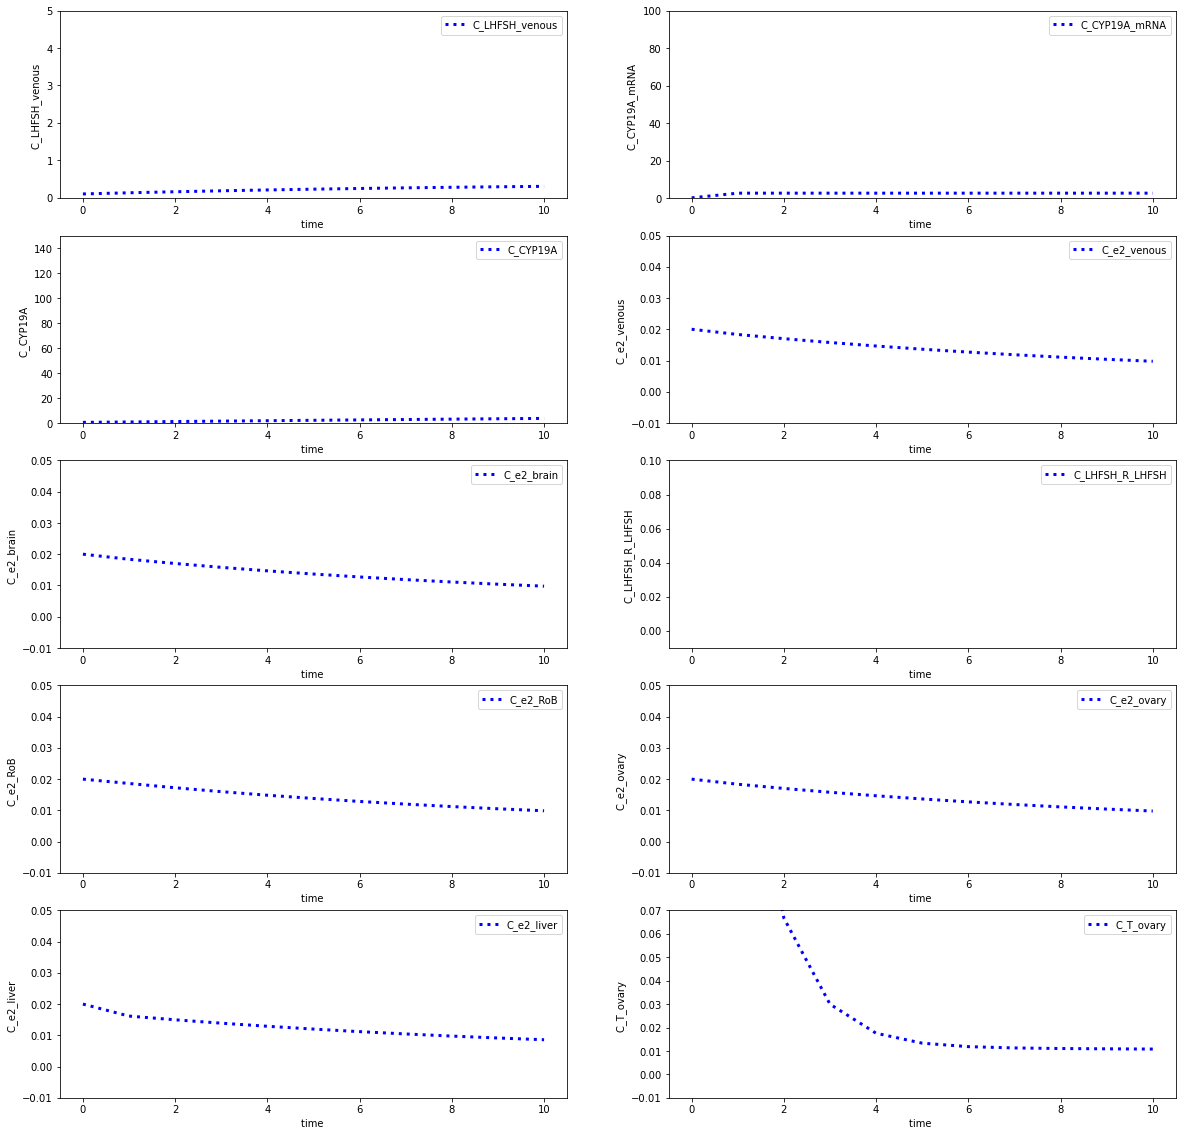

In [5]:
# Plot the inputs and results
f = plt.figure(figsize=(20, 20))
ax = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax5 = f.add_subplot(525)
ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax9 = f.add_subplot(529)
ax10 = f.add_subplot(5,2,10)

ax.plot(t, C_LHFSH_venous, 'b:', linewidth=3)
ax.set_ylabel('C_LHFSH_venous ')
ax.set_xlabel('time ')
ax.legend(['C_LHFSH_venous'],loc='best')
ax.set_ylim([-0.01, 5])

ax2.plot(t, C_CYP19A_mRNA, 'b:', linewidth=3)
ax2.set_ylabel('C_CYP19A_mRNA ')
ax2.set_xlabel('time ')
ax2.legend(['C_CYP19A_mRNA'],loc='best')
ax2.set_ylim([-0.01, 100])

ax3.plot(t, C_CYP19A, 'b:', linewidth=3)
ax3.set_ylabel('C_CYP19A ')
ax3.set_xlabel('time ')
ax3.legend(['C_CYP19A'],loc='best')
ax3.set_ylim([-0.01, 150])

ax4.plot(t, C_e2_venous, 'b:', linewidth=3)
ax4.set_ylabel('C_e2_venous ')
ax4.set_xlabel('time ')
ax4.legend(['C_e2_venous'],loc='best')
ax4.set_ylim([-0.01, 0.05])

ax5.plot(t, C_e2_brain, 'b:', linewidth=3)
ax5.set_ylabel('C_e2_brain ')
ax5.set_xlabel('time ')
ax5.legend(['C_e2_brain'],loc='best')
ax5.set_ylim([-0.01, 0.05])

ax6.plot(t, C_LHFSH_R_LHFSH, 'b:', linewidth=3)
ax6.set_ylabel('C_LHFSH_R_LHFSH ')
ax6.set_xlabel('time ')
ax6.legend(['C_LHFSH_R_LHFSH'],loc='best')
ax6.set_ylim([-0.01, 0.1])

ax7.plot(t, C_e2_RoB, 'b:', linewidth=3)
ax7.set_ylabel('C_e2_RoB ')
ax7.set_xlabel('time ')
ax7.legend(['C_e2_RoB'],loc='best')
ax7.set_ylim([-0.01, 0.05])

ax8.plot(t, C_e2_ovary, 'b:', linewidth=3)
ax8.set_ylabel('C_e2_ovary ')
ax8.set_xlabel('time ')
ax8.legend(['C_e2_ovary'],loc='best')
ax8.set_ylim([-0.01, 0.05])

ax9.plot(t, C_e2_liver, 'b:', linewidth=3)
ax9.set_ylabel('C_e2_liver ')
ax9.set_xlabel('time ')
ax9.legend(['C_e2_liver'],loc='best')
ax9.set_ylim([-0.01, 0.05])

ax10.plot(t, C_T_ovary, 'b:', linewidth=3)
ax10.set_ylabel('C_T_ovary ')
ax10.set_xlabel('time ')
ax10.legend(['C_T_ovary'],loc='best')
ax10.set_ylim([-0.01, 0.07])

plt.show()